# 5 Characterize dataset

This notebook contains functionality to characterize datasets. Let's import staff.

In [1]:
from ananke.configurations.collection import HDF5StorageConfiguration
from ananke.models.collection import Collection


Now, lets load a dataset

In [16]:
data_path='../../data/new_collection/electrical_noise_100000.h5'

storage_configuration = HDF5StorageConfiguration(data_path=data_path, read_only=False)

collection = Collection(storage_configuration)

In [17]:
with collection:
    statistics = collection.get_record_statistics()
    
statistics.df

100%|██████████| 100000/100000 [12:53<00:00, 129.27it/s]


,record_id,time,duration,type,hit_count,first_hit,last_hit
0,0,0.0,1000.0,20,57,6.455488,973.175807
1,1,0.0,1000.0,20,46,35.393874,995.190370
2,2,0.0,1000.0,20,59,41.368527,994.999211
3,3,0.0,1000.0,20,52,3.683445,983.047075
4,4,0.0,1000.0,20,46,2.439290,963.855480
...,...,...,...,...,...,...,...
99995,99995,0.0,1000.0,20,58,57.650620,979.030316
99996,99996,0.0,1000.0,20,50,5.540699,992.265563
99997,99997,0.0,1000.0,20,66,3.793520,983.228745
99998,99998,0.0,1000.0,20,54,21.422411,936.144231


In [12]:
statistics.df[statistics.df['type'] == 1]['hit_count'].max()

6811

In [18]:
statistics.df.to_feather('../../data/new_collection/electrical_noise_100000_statistics.feather')

In [38]:
with collection:
    records = collection.storage.get_records()
    hits = collection.storage.get_hits()
    sources = collection.storage.get_sources()
    detector = collection.storage.get_detector()

Look at the distribution of hits

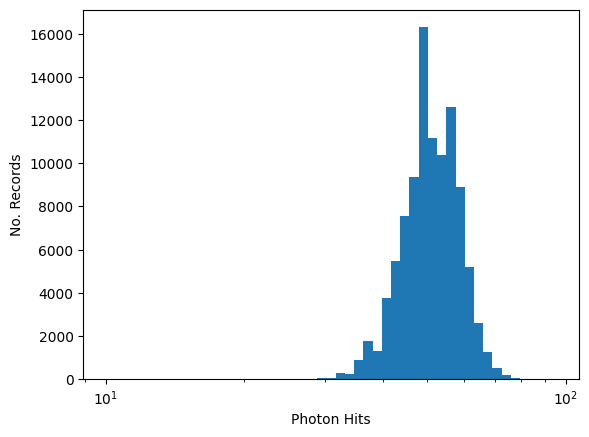

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
max_power = np.ceil(np.log10(statistics.df['hit_count'].max()))
min_power = np.floor(np.log10(statistics.df['hit_count'].min()))
bins = 10**(np.arange(min_power,max_power, .02))
ax.hist(statistics.df['hit_count'], bins=bins)
ax.set_xlabel('Photon Hits')
ax.set_ylabel('No. Records')
ax.set_xscale('log')

fig.savefig('../data/notebooks/electrical_noise_100000_distribution.png', dpi=300)

Look at the distribution of hits depending on 

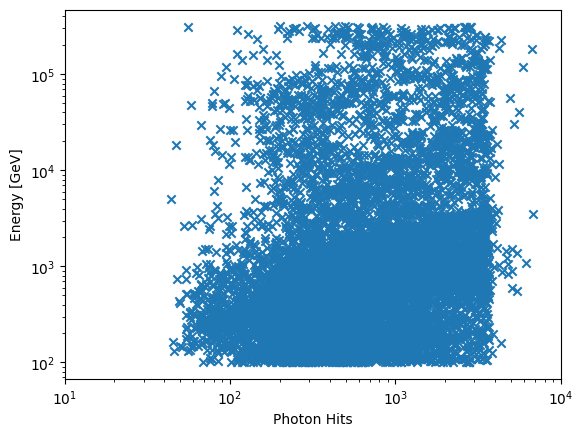

In [15]:
fig, ax = plt.subplots()
ax.scatter(statistics.df['hit_count'],statistics.df['energy'], marker="x")
ax.set_ylabel('Energy [GeV]')
ax.set_xlabel('Photon Hits')
ax.set_xlim(10**min_power, 10**max_power)
ax.set_yscale('log')
ax.set_xscale('log')

fig.savefig('../data/notebooks/combined_10_20_redistributed_scatter.png', dpi=300)